# Macroeconomía I
## El Modelo Neoclásico de Crecimiento: Método de Perturbación

Mauricio M. Tejada

ILADES - Universidad Alberto Hurtado

### El Problema de Opmización 

El problema de optimización del planificador central es el siguiente:

\begin{eqnarray*}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t}\left[\frac{c_{t}^{1-\sigma}-1}{1-\sigma}\right]\\
s.a &  & c_{t}+i_{t}=Ak_{t}^{\alpha}\\
 &  & k_{t+1}=i_{t}+(1-\delta)k_{t}\\
 &  & k_{0}\,dado.
\end{eqnarray*}

Alternativamente:

\begin{eqnarray*}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t}\left[\frac{c_{t}^{1-\sigma}-1}{1-\sigma}\right]\\
s.a &  & c_{t}+k_{t+1}=Ak_{t}^{\alpha}+(1-\delta)k_{t}\\
 &  & k_{0}\,dado.
\end{eqnarray*}

De las CPO tenemos el siguiente sistema de ecuaciones en diferencias (no lineal):


\begin{eqnarray*}
c_{t}^{-\sigma} & = & \beta c_{t+1}^{-\sigma}\left[\alpha Ak_{t+1}^{\alpha-1}+(1-\delta)\right]\\
c_{t}+k_{t+1} & = & Ak_{t}^{\alpha}+(1-\delta)k_{t}
\end{eqnarray*}

### Estado Estacionario 

El estado estacionario resuelve:
\begin{eqnarray*}
1 & = & \beta\left[\alpha Ak^{*\alpha-1}+(1-\delta)\right]\\
c^{*} & = & Ak^{*\alpha}-\delta k^{*}
\end{eqnarray*}

La solución puede ser hallada algebraicamente:

\begin{eqnarray*}
k^{*} & = & \left[\frac{1-\beta(1-\delta)}{\beta\alpha A}\right]^{\frac{1}{\alpha-1}}\\
c^{*} & = & A\left[\frac{1-\beta(1-\delta)}{\beta\alpha A}\right]^{\frac{\alpha}{\alpha-1}}-\delta\left[\frac{1-\beta(1-\delta)}{\beta\alpha A}\right]^{\frac{1}{\alpha-1}}
\end{eqnarray*}

In [76]:
# Parametrización

α = 0.3
β = 0.9
σ = 0.5
A = 2
δ = 0.25

params = (α, β, σ, A, δ);

In [77]:
# Definimos el número de variables de estado y de control

n = 1  # Variables de estado
m = 1;  # Variables de control

Calculamos el estado estacionario. Tenemos dos alternativas: (1) algebráicamente y (2) usando solver de julia.

In [78]:
# Caso 1
ks = ((1-β*(1-δ))/(α*β*A))^(1/(α-1))
cs = A*(ks^α) - δ*ks
ys = A*(ks^α)
is = ks - (1-δ)*ks

println("ks = $ks")
println("cs = $cs")
println("ys = $ys")
println("is = $is")

ks = 2.065450805481485
cs = 1.9698280830054897
ys = 2.486190784375861
is = 0.5163627013703711


In [79]:
# Caso 2
# Definimos primero es sistema de ecuaciones a resolver.

function systemss(x,pr)
    # Nota: los parámetros dentro la función son considerados variables locales 
    α, β, σ, A, δ = pr
    
    ks = x[1]
    cs = x[2]
    
    fout = zeros(2)

    fout[1] = ks - ((1-β*(1-δ))/(α*β*A))^(1/(α-1))
    fout[2] = cs - A*(ks^α) + δ*ks
    
    return fout
end

systemss (generic function with 1 method)

Ahora usamos el paquete `NLsolve`: 

In [80]:
# Pkg.add("NLsolve")
using NLsolve

xss = nlsolve(not_in_place(x -> systemss(x,params)), [0.5; 0.5])

ks_c2 = xss.zero[1]
cs_c2 = xss.zero[2]

println("ks = $ks_c2")
println("cs = $cs_c2")

ks = 2.065450805481485
cs = 1.9698280830054893


### Aproximación Lineal

Aproximación alrededor del Estado Estacionario:

\begin{eqnarray*}
-\left(\sigma c^{*-\sigma-1}\right)\hat{c}_{t}+\left(\sigma c^{*-\sigma-1}\right)\hat{c}_{t+1}-\left(\beta c^{*-\sigma}\alpha(\alpha-1)Ak^{*\alpha-2}\right)\hat{k}_{t+1} & = & 0\\
\hat{k}_{t+1}-\frac{1}{\beta}\hat{k}_{t}+\hat{c}_{t} & = & 0
\end{eqnarray*}

Matricialmente:
\begin{eqnarray*}
\left[\begin{array}{cc}
-\beta c^{*-\sigma}\alpha(\alpha-1)Ak^{*\alpha-2} & \sigma c^{*-\sigma-1}\\
1 & 0
\end{array}\right]\left[\begin{array}{c}
\hat{k}_{t+1}\\
\hat{c}_{t+1}
\end{array}\right]\\
+\left[\begin{array}{cc}
0 & -\sigma c^{*-\sigma-1}\\
-\frac{1}{\beta} & 1
\end{array}\right]\left[\begin{array}{c}
\hat{k}_{t}\\
\hat{c}_{t}
\end{array}\right] & = & 0
\end{eqnarray*}


In [81]:
function systemcpo(x, pr)
    α, β, σ, A, δ = pr

    kf = x[1]
    cf = x[2]
    k  = x[3]
    c  = x[4]
    
    fout = similar(x, 2)

    fout[1] = c^-σ - β*(cf^-σ)*(α*A*(kf^(α-1))+(1-δ))
    fout[2] = c + kf - A*(k^α) - (1-δ)*k
    
    return fout
end

systemcpo (generic function with 1 method)

Verificamos si el sistema asociado a las CPOs esta bien escrito. En estado estacionario debiera cumplirse exáctamente con cero.

In [82]:
systemcpo([ks; cs; ks; cs], params)

2-element Array{Float64,1}:
 0.0
 0.0

En general escribimos el sistema de ecuaciones en diferencias no lineal como:

$$\Phi(x_{t},x_{t+1})=0_{n+m\times1}$$

Donde $x_{t}\in\mathbb{R}^{n}$. Las primeras $n$ variables son
de estado (tienen condiciones iniciales) y las siguiente $m$
son variables de control (variables que saltan). Las condiciones iniciales
de éstas últimas se eligen de tal manera que la CTV se cumplan.

El sistema linealizado se puede escribir entonces como:

$$
\Phi_{x_{t+1}}(x^{*},x^{*})\hat{x}_{t+1}+\Phi_{x_{t}}(x^{*},x^{*})\hat{x}_{t}=0_{n+m\times1}
$$

donde $\hat{x}_{t+i}=(x_{t+i}-x^{*})$ y $\Phi_{x_{t+i}}(x^{*},x^{*})$
es la matriz de derivadas del sistema con respecto a las variables
en $x_{t+i}$ ($i=0,1$), respectivamente. El sistema lineal se puede
escribir entonces:
$$
\hat{x}_{t+1}=-\left[\Phi_{x_{t+1}}(x^{*},x^{*})\right]^{-1}\Phi_{x_{t}}(x^{*},x^{*})\hat{x}_{t}
$$

o alternativamente:
$$
\hat{x}_{t+1}=J\hat{x}_{t}
$$

Esta matriz $J$ tendrá $n$ autovalores dentro el circulo unitario
y $m$ autovalores fuera de tal circulo.

Usamos el paquete `ForwardDiff` para calcular la matriz jacobiana del sistema:

In [83]:
# Pkg.add("ForwardDiff")
using ForwardDiff

jac_systemcpo(y) = ForwardDiff.jacobian(x -> systemcpo(x,params), y)
xvars = [ks; cs; ks; cs]
PHI = jac_systemcpo(xvars)

2×4 Array{Float64,2}:
 0.0784788  0.180854   0.0      -0.180854
 1.0        0.0       -1.11111   1.0     

A partir de este punto el procedimiento es estándar. Por tanto, el código puede ser reutilizado.

In [84]:
PHI_f = PHI[:,1:n+m]     # PHI x(t)
PHI_t = PHI[:,n+m+1:end] # PHI x(t+1)

J = - PHI_f\PHI_t

2×2 Array{Float64,2}:
  1.11111  -1.0    
 -0.48215   1.43394

### Solución del Sistema de Ecuaciones en Diferencias

Sea $X_{t}=T^{-1}\hat{x}_{t}$ con $J=TST^{-1}$ donde en la diagonal
de $S$ tenemos los autovalores de $J$ . $S$ es la factorización
de Schur de $J$.
$$
\left[\begin{array}{c}
X_{1,t+1}\\
X_{2,t+1}
\end{array}\right]=\left[\begin{array}{cc}
S_{11} & S_{12}\\
0_{m\times n} & S_{22}
\end{array}\right]\left[\begin{array}{c}
X_{1,t}\\
X_{2,t}
\end{array}\right]
$$

con $S_{11}$ de tamaño $n \times n$, $S_{12}$ de tamaño $n \times m$, y  $S_{22}$ de tamaño $m \times m$.

In [85]:
shuc_J = schurfact(J);

In [86]:
S = shuc_J.T

2×2 Array{Float64,2}:
 0.559639  -0.51785
 0.0        1.98541

Uno de los autovalores es menor que 1 (el asociado al capital) y el otro mayor que 1 (el asociado al consumo).

In [87]:
T = shuc_J.Z

2×2 Array{Float64,2}:
 -0.875671   0.482908
 -0.482908  -0.875671

Verificamos que la descomposición es correcta:

In [88]:
T*S*inv(T)

2×2 Array{Float64,2}:
  1.11111  -1.0    
 -0.48215   1.43394

Como todos los autovalores enn $S_{22}$ estan fuera del círculo unitario,
la CTV sólo se cumple si $X_{2,0}=0.$ Entonces $X_{2,t}=0_{m\times1}$.
Por tanto:
$$
\left[\begin{array}{c}
X_{1,t+1}\\
0_{n_{2}\times1}
\end{array}\right]=\left[\begin{array}{cc}
T^{11} & T^{12}\\
T^{21} & T^{22}
\end{array}\right]\left[\begin{array}{c}
\hat{x}_{1,t}\\
\hat{x}_{2,t}
\end{array}\right]
$$

Entonces la función de política para las variables de control es:
$$
\hat{x}_{2,t}=-(T^{22})^{-1}T^{21}\hat{x}_{1,t}
$$

Por otro lado tenemos que
$$
X_{1,t+1}=(T^{11}-T^{12}(T^{22})^{-1}T^{21})\hat{x}_{1,t}
$$

Usando el hecho que $X_{1,t+1}=S_{11}X_{1,t}$ tenemos que la función
de política para las variables de estado es:
$$
\hat{x}_{1,t+1}=(T^{11}-T^{12}(T^{22})^{-1}T^{21})^{-1}S_{11}(T^{11}-T^{12}(T^{22})^{-1}T^{21})\hat{x}_{1,t}
$$

Note que $\hat{x}_{1,t} = [\hat{k}_{t}]$ y $\hat{x}_{2,t} = [\hat{c}_{t}]$

In [89]:
Tinv = inv(T);
T11  = Tinv[1:n,1:n]
T12  = Tinv[1:n,n+1:n+m]
T21  = Tinv[n+1:n+m,1:n]
T22  = Tinv[n+1:n+m,n+1:n+m];

In [90]:
YX = - inv(T22)*T21
XX = inv(T11 - T12*inv(T22)*T21)*S[1:n,1:n]*(T11 - T12*inv(T22)*T21)

println("Solucion:")
println("c(t) = $(YX[1]) * k(t)")
println("k(t+1) = $(XX[1]) * k(t)")

Solucion:
c(t) = 0.5514722813918106 * k(t)
k(t+1) = 0.5596388297193005 * k(t)


### Simulando Transiciones al Estado Estacionario

In [91]:
k0 = 0.2*ks
println("Stock de Capital Inicial es $k0")

Stock de Capital Inicial es 0.413090161096297


In [92]:
using Plots
gr() 

Plots.GRBackend()

In [93]:
T = 15
cc = zeros(T)
kk = zeros(T+1)
yy = zeros(T)
ii = zeros(T)

kk[1] = k0

for t in range(1,T)
    cc[t] = cs + YX[1]*(kk[t]-ks)
    kk[t+1] = ks + XX[1]*(kk[t]-ks)
    yy[t] = ys + α*(ks^(α-1))*(kk[t]-ks)
    ii[t] = kk[t+1]-(1-δ)*kk[t]  
end

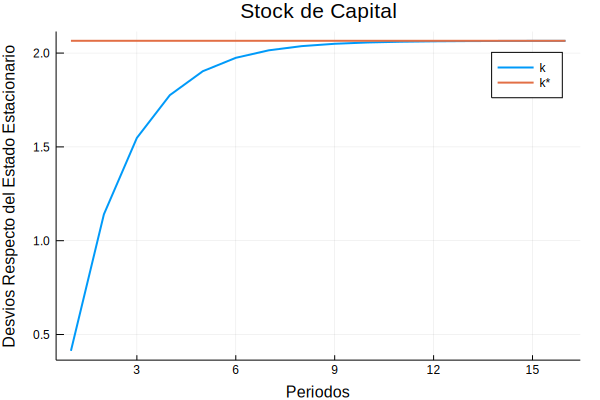

In [94]:
plot([kk ks*ones(T+1)], title = "Stock de Capital", 
     xlabel = "Periodos", ylabel = "Desvios Respecto del Estado Estacionario",
     label=["k" "k*"], legend = true, linewidth = 2, grid = true)

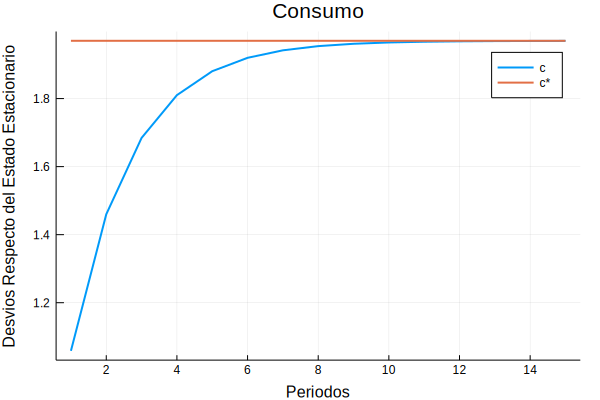

In [95]:
plot([cc cs*ones(T)], title = "Consumo", 
     xlabel = "Periodos", ylabel = "Desvios Respecto del Estado Estacionario",
     label=["c" "c*"], legend = true, linewidth = 2, grid = true)

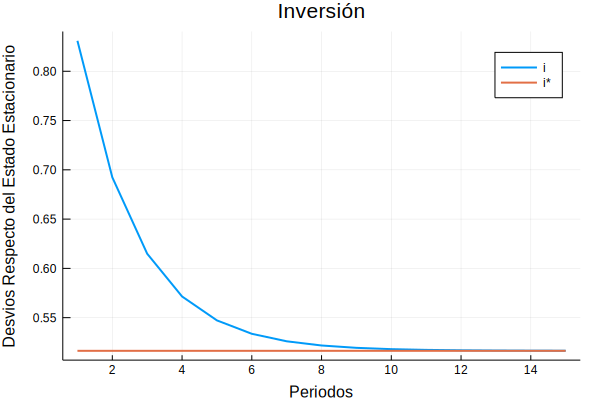

In [96]:
plot([ii is*ones(T)], title = "Inversión", 
     xlabel = "Periodos", ylabel = "Desvios Respecto del Estado Estacionario",
     label=["i" "i*"], legend = true, linewidth = 2, grid = true)

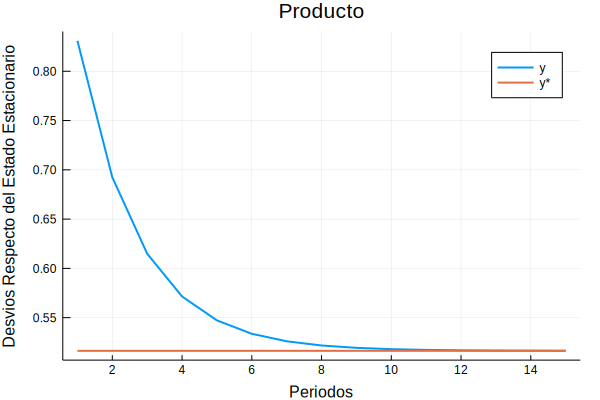

In [97]:
plot([ii is*ones(T)], title = "Producto", 
     xlabel = "Periodos", ylabel = "Desvios Respecto del Estado Estacionario",
     label=["y" "y*"], legend = true, linewidth = 2, grid = true)

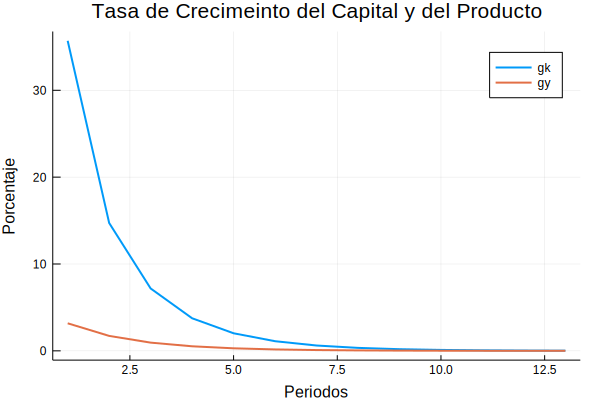

In [98]:
gk = (kk[3:T]./kk[2:T-1] - 1)*100 # Desde k1
gy = (yy[3:T]./yy[2:T-1] - 1)*100

plot([gk gy], title = "Tasa de Crecimeinto del Capital y del Producto", 
     xlabel = "Periodos", ylabel = "Porcentaje",
     label=["gk" "gy"], legend = true, linewidth = 2, grid = true)